In [1]:
%load_ext autoreload
%autoreload 2

# standard python imports
import numpy as np
import matplotlib.pyplot as plt

# tidy3d imports
import tidy3d as td
import tidy3d.web as web

Using Tidy3D credentials from stored file


In [2]:
# for easy conversion of units
unit = 1

# Define material properties
medium = td.Medium(permittivity=5)

wavelength = 1 * unit / np.sqrt(medium.permittivity)
f0 = td.C_0 / wavelength
print(wavelength, f0)

# length and location of the dipole
dipole_center = [0, 0, 0]
dipole_length = 0 # Hertzian dipole
dipole_size = [0, 0, 0]

# buffer between the dipole and the near field monitor
buffer_mon = 1 * wavelength

# Set the domain size in x, y, and z
domain_size = 6 * wavelength

# resolution control
#grids_per_wavelength = 25
grids_per_wavelength = 30

# create the geometry
geometry = []

# grid size (um)
dl = wavelength / grids_per_wavelength

# Define PML layers
pml_layers = 3*[td.PML()]

# construct simulation size array
sim_size = (domain_size, domain_size, domain_size)

0.4472135954999579 670356316528787.2


## Create the dipole source

In [3]:
# Bandwidth in Hz
fwidth = f0 / 10.0

# Gaussian source offset; the source peak is at time t = offset/fwidth
offset = 4.

# time dependence of source
gaussian = td.GaussianPulse(freq0=f0, fwidth=fwidth, offset=offset)

source = td.VolumeSource(
    center=dipole_center,
    size=dipole_size,
    source_time=gaussian,
    polarization='Ez')

# Simulation run time past the source decay (around t=2*offset/fwidth)
run_time = 40 / fwidth


In [4]:
# create a volume monitor around the sphere
mon_size = [x + buffer_mon for x in dipole_size]

monitor = td.FieldMonitor(
    center=dipole_center,
    size=mon_size,
    freqs=[f0],
    name='near_field')

# get the surface monitors associated with the volume monitor
monitors = monitor.surfaces()


## Create Simulation

Now we can put everything together and define a simulation class to be run



In [5]:
sim = td.Simulation(
    size=sim_size,
    grid_size=[dl, dl, dl],
    structures=geometry,
    sources=[source],
    monitors=monitors,
    run_time=run_time,
    pml_layers=pml_layers,
    medium=medium
)


## Visualize Geometry


<Figure size 1440x576 with 6 Axes>

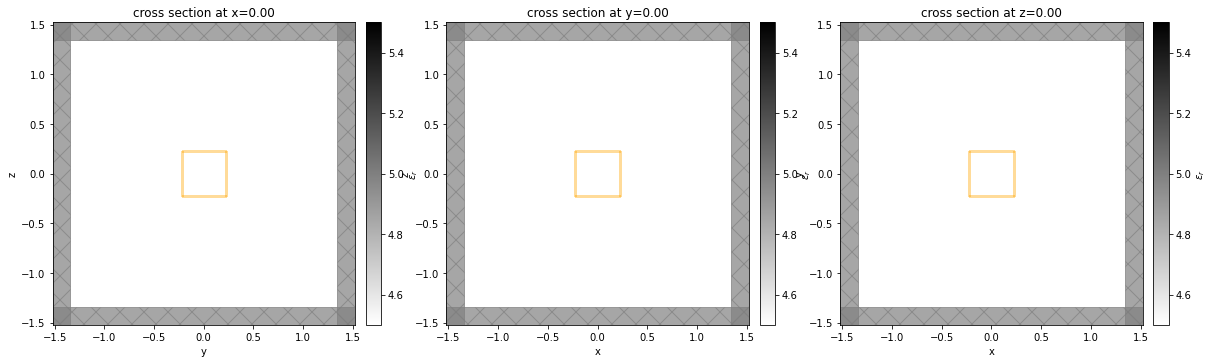

In [6]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 8))
sim.plot_eps(x=0, ax=ax1);
sim.plot_eps(y=0, ax=ax2);
sim.plot_eps(z=0, ax=ax3);


## Run Simulation

In [7]:
# Run simulation
import tidy3d.web as web

sim_data = web.run(sim, task_name='dipole', path='data/dipole.hdf5')

# sim_data = td.SimulationData.from_file(fname='data/dipole.hdf5')
# sim_data = sim_data.normalize()

[18:02:16] INFO     Uploaded task 'dipole' with task_id                         ]8;id=403315;file:///home/shashwat/flexcompute/repositories/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=844378;file:///home/shashwat/flexcompute/repositories/tidy3d/tidy3d/web/webapi.py#108\108]8;;\
                    '535eb449-ef78-472b-a463-d4eff51e6d5f'.                                  

Output()

[18:02:18] status = queued                                                      ]8;id=272277;file:///home/shashwat/flexcompute/repositories/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=834271;file:///home/shashwat/flexcompute/repositories/tidy3d/tidy3d/web/webapi.py#202\202]8;;\

[18:02:56] status = preprocess                                                  ]8;id=339037;file:///home/shashwat/flexcompute/repositories/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=373860;file:///home/shashwat/flexcompute/repositories/tidy3d/tidy3d/web/webapi.py#202\202]8;;\

[18:03:22] status = running                                                     ]8;id=609034;file:///home/shashwat/flexcompute/repositories/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=755946;file:///home/shashwat/flexcompute/repositories/tidy3d/tidy3d/web/webapi.py#202\202]8;;\

[18:03:51] status = postprocess                                                 ]8;id=206190;file:///home/shashwat/flexcompute/repositories/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=25753;file:///home/shashwat/flexcompute/repositories/tidy3d/tidy3d/web/webapi.py#202\202]8;;\

[18:03:57] status = success                                                     ]8;id=986425;file:///home/shashwat/flexcompute/repositories/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=984253;file:///home/shashwat/flexcompute/repositories/tidy3d/tidy3d/web/webapi.py#202\202]8;;\

[18:03:58] INFO     downloading file "monitor_data.hdf5" to "data/dipole.hdf5"  ]8;id=913789;file:///home/shashwat/flexcompute/repositories/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=970248;file:///home/shashwat/flexcompute/repositories/tidy3d/tidy3d/web/webapi.py#483\483]8;;\

Output()

[18:04:00] INFO     loading SimulationData from data/dipole.hdf5                ]8;id=763773;file:///home/shashwat/flexcompute/repositories/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=731597;file:///home/shashwat/flexcompute/repositories/tidy3d/tidy3d/web/webapi.py#302\302]8;;\

## Plot the electric field on the surface monitors

<Figure size 864x216 with 6 Axes>

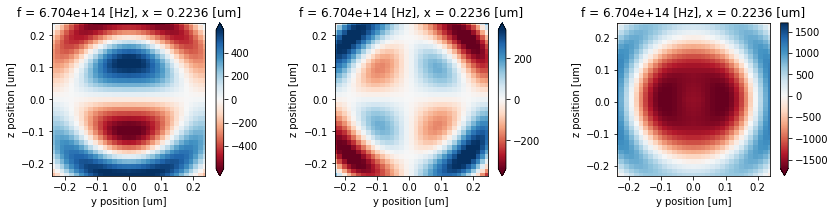

<Figure size 864x216 with 6 Axes>

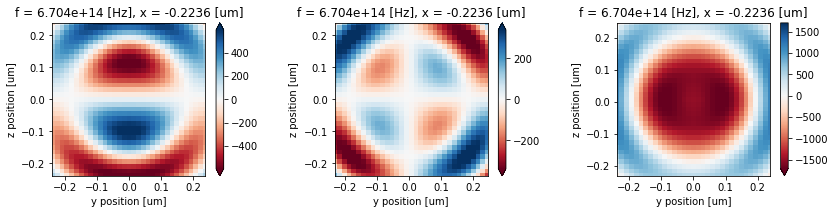

<Figure size 864x216 with 6 Axes>

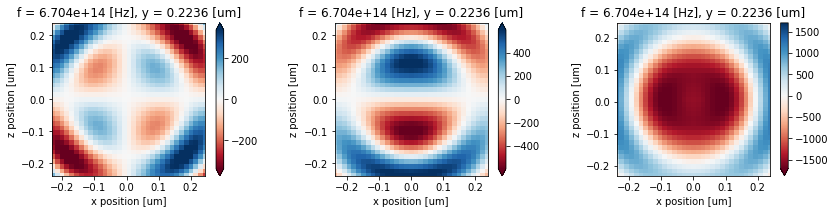

<Figure size 864x216 with 6 Axes>

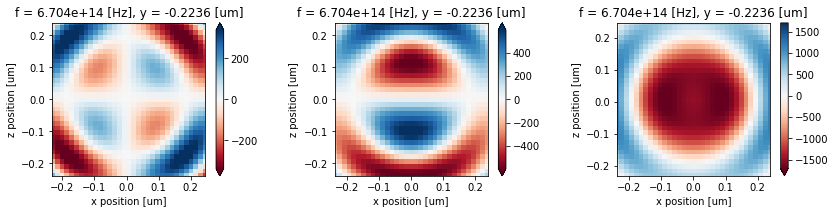

<Figure size 864x216 with 6 Axes>

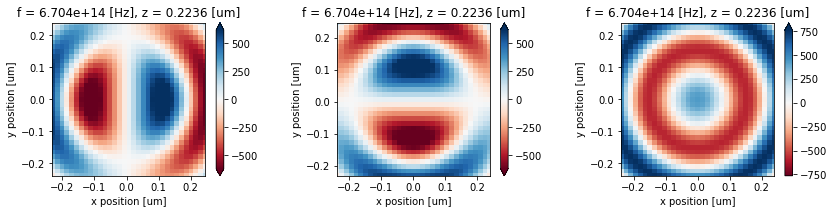

<Figure size 864x216 with 6 Axes>

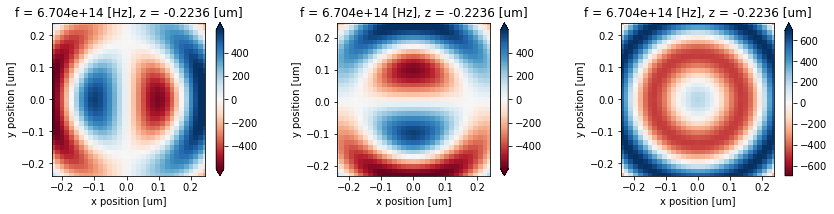

In [8]:
val = 'real'

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, tight_layout=True, figsize=(12, 3))

sim_data.plot_field(field_monitor_name='near_field_x+', field_name='Ex', x=mon_size[0]/2, val=val, freq=f0, ax=ax1)
sim_data.plot_field(field_monitor_name='near_field_x+', field_name='Ey', x=mon_size[0]/2, val=val, freq=f0, ax=ax2)
sim_data.plot_field(field_monitor_name='near_field_x+', field_name='Ez', x=mon_size[0]/2, val=val, freq=f0, ax=ax3)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, tight_layout=True, figsize=(12, 3))

sim_data.plot_field(field_monitor_name='near_field_x-', field_name='Ex', x=-mon_size[0]/2, val=val, freq=f0, ax=ax1)
sim_data.plot_field(field_monitor_name='near_field_x-', field_name='Ey', x=-mon_size[0]/2, val=val, freq=f0, ax=ax2)
sim_data.plot_field(field_monitor_name='near_field_x-', field_name='Ez', x=-mon_size[0]/2, val=val, freq=f0, ax=ax3)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, tight_layout=True, figsize=(12, 3))

sim_data.plot_field(field_monitor_name='near_field_y+', field_name='Ex', y=mon_size[1]/2, val=val, freq=f0, ax=ax1)
sim_data.plot_field(field_monitor_name='near_field_y+', field_name='Ey', y=mon_size[1]/2, val=val, freq=f0, ax=ax2)
sim_data.plot_field(field_monitor_name='near_field_y+', field_name='Ez', y=mon_size[1]/2, val=val, freq=f0, ax=ax3)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, tight_layout=True, figsize=(12, 3))

sim_data.plot_field(field_monitor_name='near_field_y-', field_name='Ex', y=-mon_size[1]/2, val=val, freq=f0, ax=ax1)
sim_data.plot_field(field_monitor_name='near_field_y-', field_name='Ey', y=-mon_size[1]/2, val=val, freq=f0, ax=ax2)
sim_data.plot_field(field_monitor_name='near_field_y-', field_name='Ez', y=-mon_size[1]/2, val=val, freq=f0, ax=ax3)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, tight_layout=True, figsize=(12, 3))

sim_data.plot_field(field_monitor_name='near_field_z+', field_name='Ex', z=mon_size[2]/2, val=val, freq=f0, ax=ax1)
sim_data.plot_field(field_monitor_name='near_field_z+', field_name='Ey', z=mon_size[2]/2, val=val, freq=f0, ax=ax2)
sim_data.plot_field(field_monitor_name='near_field_z+', field_name='Ez', z=mon_size[2]/2, val=val, freq=f0, ax=ax3)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, tight_layout=True, figsize=(12, 3))

sim_data.plot_field(field_monitor_name='near_field_z-', field_name='Ex', z=-mon_size[2]/2, val=val, freq=f0, ax=ax1)
sim_data.plot_field(field_monitor_name='near_field_z-', field_name='Ey', z=-mon_size[2]/2, val=val, freq=f0, ax=ax2)
sim_data.plot_field(field_monitor_name='near_field_z-', field_name='Ez', z=-mon_size[2]/2, val=val, freq=f0, ax=ax3)

plt.show()


## Begin near2far tranformations

In [9]:
from tidy3d.plugins import Near2Far, Near2FarSurface

n2f = Near2Far.from_surface_monitors(
    sim_data=sim_data, 
    mons=monitors, 
    normal_dirs=['-','+','-','+','-','+'], 
    frequency=f0, 
    pts_per_wavelength=10,
    medium=medium
)
n2f.phasor_sign = 1


# Function to compute the near or far field form a z-oriented Hertzian dipole at the origin, assuming that I*L = 1, where I is the strength of the current and L is the tiny length of the dipole

In [10]:
from tidy3d.constants import EPSILON_0, MU_0

phasor_sign = 1 # 1 => exp(jkr), -1 => exp(-jkr)
#phase_shift = np.pi/2
phase_shift = 0

# reference: https://www.waves.utoronto.ca/prof/svhum/ece422/notes/05-dipole.pdf
def dipole_field(r, theta, phi, f, far=False):
    
    omega = 2 * np.pi * f
    k = omega * np.sqrt(EPSILON_0 * MU_0) * np.sqrt(medium.permittivity)
    
    sin_theta = np.sin(theta)
    cos_theta = np.cos(theta)
    
    sin_phi = np.sin(phi)
    cos_phi = np.cos(phi)
    
    G = np.exp(phasor_sign * 1j * k * r) / (4.0 * np.pi * r)
    prefactor = phasor_sign * (-1 / (1j * omega * EPSILON_0 * medium.permittivity))
    
    # compute in spherical coordinates    
    if far == True:
        E_theta = -prefactor * sin_theta * G * (k**2)
        E_r = np.zeros_like(E_theta)
        E_phi = np.zeros_like(E_theta)
        
        H_phi = (sin_theta * G) * (-phasor_sign * 1j * k)
        H_r = np.zeros_like(H_phi)
        H_theta = np.zeros_like(H_phi)
    else:
        E_r = prefactor * 2 * cos_theta * G * (-phasor_sign * 1j * k / r + 1 / (r**2))
        E_theta = -prefactor * sin_theta * G * (k**2 + phasor_sign * 1j * k / r - 1 / (r**2))
        E_phi = np.zeros_like(E_theta)

        H_phi = (sin_theta * G) * (-phasor_sign * 1j * k + 1 / r)
        H_r = np.zeros_like(H_phi)
        H_theta = np.zeros_like(H_phi)        
    
    E_sph = np.stack((E_r, E_theta, E_phi))*np.exp(1j * phase_shift)
    H_sph = np.stack((H_r, H_theta, H_phi))*np.exp(1j * phase_shift)

    # convert to cartesian coordinates
    # reference: https://en.wikipedia.org/wiki/Unit_vector#Spherical_coordinates
    Ex = sin_theta * cos_phi * E_r + cos_theta * cos_phi * E_theta
    Ey = sin_theta * sin_phi * E_r + cos_theta * sin_phi * E_theta
    Ez = cos_theta * E_r - sin_theta * E_theta

    Hx = -sin_phi * H_phi
    Hy = cos_phi * H_phi
    Hz = np.zeros_like(Hx)
    
    E_car = np.stack((Ex, Ey, Ez))*np.exp(1j * phase_shift)
    H_car = np.stack((Hx, Hy, Hz))*np.exp(1j * phase_shift)

    return E_sph, H_sph, E_car, H_car


# Project monitor fields to the far field

In [11]:
# projection distance
far_distance = 500 * wavelength

num_theta = 50
num_phi = 2
thetas = np.linspace(0, np.pi, num_theta)
phis = np.linspace(0, np.pi/2, num_phi)

# initialize the far field values
RCS = np.zeros((num_theta, num_phi))
E = np.zeros((num_theta, num_phi))
Ec = np.zeros((3, num_theta, num_phi), dtype=complex)

# also compute and store the analytical far field
Ea = np.zeros((3, num_theta, num_phi), dtype=complex)

from rich.progress import track

# loop through points in the output plane
for i in track(np.arange(len(thetas)), description='Performing far-field transformation...'):

    theta = thetas[i]
    for j in np.arange(len(phis)):
        phi = phis[j]

        # compute and store the outputs from projection function at the focal plane
        _RCS = n2f.radar_cross_section(theta, phi)
        RCS[i, j] = np.squeeze(_RCS)

        _E, _H = n2f.fields_spherical(far_distance, theta, phi)
        Ec[:, i, j] = np.squeeze(_E)
        _E = np.linalg.norm(_E, 2)
        E[i, j] = np.squeeze(_E)
        
        Ea[:, i, j], temp1, temp2, temp3 = dipole_field(far_distance, theta, phi, f0, True)
        
        #print(RCS[i, j], E[i, j])


Output()

# Compare the analytical far field to the near2far far field

0.3990122995314969 1.8399150939220397
0.6106565102658443 1.8423082892086111


<Figure size 720x360 with 2 Axes>

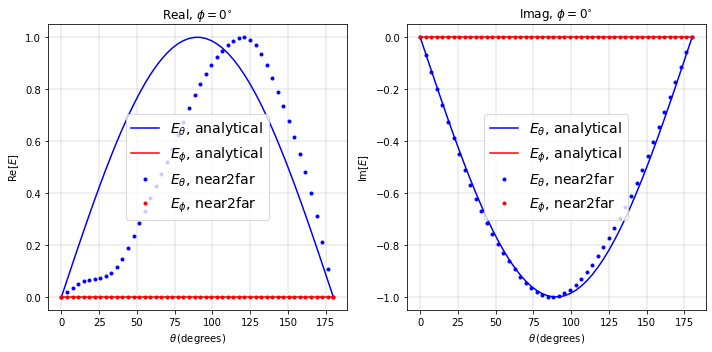

<Figure size 720x360 with 2 Axes>

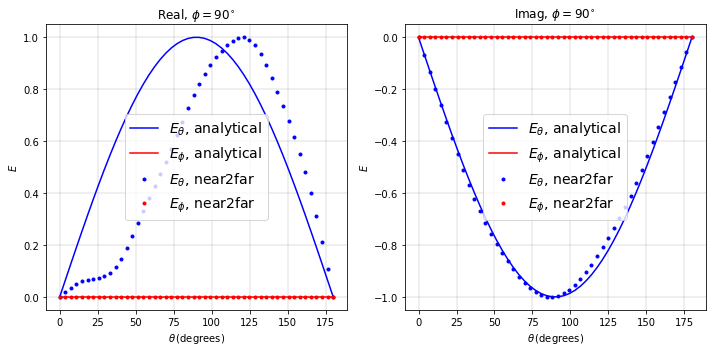

In [12]:
def scale_fn(val):
    val = val / np.max(np.abs(val))
    return 10.0*np.log10(val)

def plot_fn(val):
    return np.abs(val)

def realnorm_fn(val, norm_val):
    return np.real(val)/np.max(np.abs(np.real(norm_val)))

def imagnorm_fn(val, norm_val):
    return np.imag(val)/np.max(np.abs(np.imag(norm_val)))

RCS_phi0 = scale_fn(np.squeeze(RCS[:,0]))
RCS_phi90 = scale_fn(np.squeeze(RCS[:,1]))

E_phi0 = scale_fn(plot_fn(np.squeeze(E[:,0])))
E_phi90 = scale_fn(plot_fn(np.squeeze(E[:,1])))

#fig, ax = plt.subplots(figsize=(7.5, 5))

##ax.plot(mie_theta_phi0, mie_phi0, '-b', label="$\\phi = 0$, Mie")
##ax.plot(mie_theta_phi90, mie_phi90, '-r', label="$\\phi = \\pi/2$, Mie")
#ax.plot(thetas, RCS_phi0, '.--b', label="$\\phi = 0$, near2far")
#ax.plot(thetas, RCS_phi90, '.--r', label="$\\phi = \\pi/2$, near2far")
#ax.set(xlabel = "$\\theta\\,$(degrees)",
#       ylabel = "Bistatic RCS\\,(dBsm)",
#       yscale = 'linear',
#       xscale = 'linear'
#      )
#ax.grid(visible = True, which = 'both', axis = 'both', linewidth = 0.4)
#ax.legend(loc='best', prop={'size': 14})
#plt.tight_layout()

print(np.max(np.abs(np.real(Ea))), np.max(np.abs(np.imag(Ea))))
print(np.max(np.abs(np.real(Ec))), np.max(np.abs(np.imag(Ec))))

fig, (ax) =  plt.subplots(1,2,figsize=(10, 5))

ax[0].plot(thetas * 180 / np.pi, realnorm_fn(Ea[1,:,0], Ea), '-b', label="$E_\\theta$, analytical")
ax[0].plot(thetas * 180 / np.pi, realnorm_fn(Ea[2,:,0], Ea), '-r', label="$E_\\phi$, analytical")
ax[0].plot(thetas * 180 / np.pi, realnorm_fn(Ec[1,:,0], Ec), '.b', label="$E_\\theta$, near2far")
ax[0].plot(thetas * 180 / np.pi, realnorm_fn(Ec[2,:,0], Ec), '.r', label="$E_\\phi$, near2far")
ax[0].set(xlabel = "$\\theta\\,$(degrees)",
       ylabel = "Re[$E$]",
       yscale = 'linear',
       xscale = 'linear'
      )
ax[0].set_title('Real, $\\phi = 0^{\\circ}$')
ax[0].grid(visible = True, which = 'both', axis = 'both', linewidth = 0.4)
ax[0].legend(loc='best', prop={'size': 14})

ax[1].plot(thetas * 180 / np.pi, imagnorm_fn(Ea[1,:,0], Ea), '-b', label="$E_\\theta$, analytical")
ax[1].plot(thetas * 180 / np.pi, imagnorm_fn(Ea[2,:,0], Ea), '-r', label="$E_\\phi$, analytical")
ax[1].plot(thetas * 180 / np.pi, imagnorm_fn(Ec[1,:,0], Ec), '.b', label="$E_\\theta$, near2far")
ax[1].plot(thetas * 180 / np.pi, imagnorm_fn(Ec[2,:,0], Ec), '.r', label="$E_\\phi$, near2far")
ax[1].set(xlabel = "$\\theta\\,$(degrees)",
       ylabel = "Im[$E$]",
       yscale = 'linear',
       xscale = 'linear'
      )
ax[1].set_title('Imag, $\\phi = 0^{\\circ}$')
ax[1].grid(visible = True, which = 'both', axis = 'both', linewidth = 0.4)
ax[1].legend(loc='best', prop={'size': 14})

fig.tight_layout()


fig, (ax) =  plt.subplots(1,2,figsize=(10, 5))

ax[0].plot(thetas * 180 / np.pi, realnorm_fn(Ea[1,:,1], Ea), '-b', label="$E_\\theta$, analytical")
ax[0].plot(thetas * 180 / np.pi, realnorm_fn(Ea[2,:,1], Ea), '-r', label="$E_\\phi$, analytical")
ax[0].plot(thetas * 180 / np.pi, realnorm_fn(Ec[1,:,1], Ec), '.b', label="$E_\\theta$, near2far")
ax[0].plot(thetas * 180 / np.pi, realnorm_fn(Ec[2,:,1], Ec), '.r', label="$E_\\phi$, near2far")
ax[0].set(xlabel = "$\\theta\\,$(degrees)",
       ylabel = "$E$",
       yscale = 'linear',
       xscale = 'linear'
      )
ax[0].set_title('Real, $\\phi = 90^{\\circ}$')
ax[0].grid(visible = True, which = 'both', axis = 'both', linewidth = 0.4)
ax[0].legend(loc='best', prop={'size': 14})

ax[1].plot(thetas * 180 / np.pi, imagnorm_fn(Ea[1,:,1], Ea), '-b', label="$E_\\theta$, analytical")
ax[1].plot(thetas * 180 / np.pi, imagnorm_fn(Ea[2,:,1], Ea), '-r', label="$E_\\phi$, analytical")
ax[1].plot(thetas * 180 / np.pi, imagnorm_fn(Ec[1,:,1], Ec), '.b', label="$E_\\theta$, near2far")
ax[1].plot(thetas * 180 / np.pi, imagnorm_fn(Ec[2,:,1], Ec), '.r', label="$E_\\phi$, near2far")
ax[1].set(xlabel = "$\\theta\\,$(degrees)",
       ylabel = "$E$",
       yscale = 'linear',
       xscale = 'linear'
      )
ax[1].set_title('Imag, $\\phi = 90^{\\circ}$')
ax[1].grid(visible = True, which = 'both', axis = 'both', linewidth = 0.4)
ax[1].legend(loc='best', prop={'size': 14})

fig.tight_layout()

plt.show()

# Some helper functions

In [13]:
def pmesh(xs, ys, array, ax, cmap):
    im = ax.pcolormesh(xs, ys, array.T, cmap=cmap, shading='auto')
    return im

func = 'real'
def plotfunc(val):
    return np.real(val)

def plot_E_components(plot_x, plot_y, E_near):
    
    fig, (axes) =  plt.subplots(1, 3)
    fig.set_size_inches(12, 3)
    fig.tight_layout()

    for ax, direction, E in zip(axes, 'xyz', E_near):
        im = pmesh(plot_x, plot_y, plotfunc(E), ax=ax, cmap='RdBu')
        ax.set_title(f'analytical near field E{direction}')
        ax.set_aspect(1)
        ax.set_xlabel('x position [um]')
        ax.set_ylabel('y position [um]')
        plt.colorbar(im, ax=ax)


# Compute the analytical near fields from the dipole at points corresponding to the surface monitors from above, to compare near fields from Tidy3D to near fields from the analytical formulae

<Figure size 864x216 with 6 Axes>

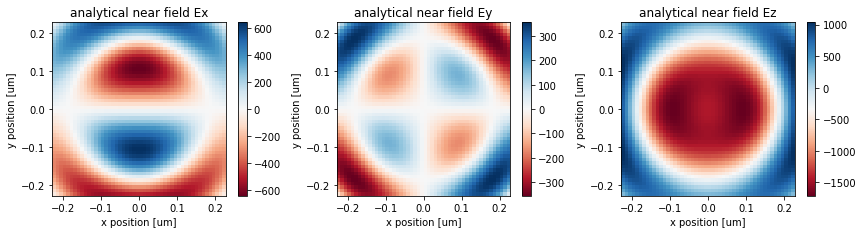

<Figure size 864x216 with 6 Axes>

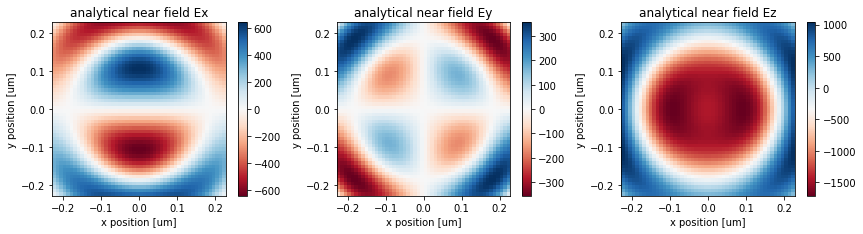

<Figure size 864x216 with 6 Axes>

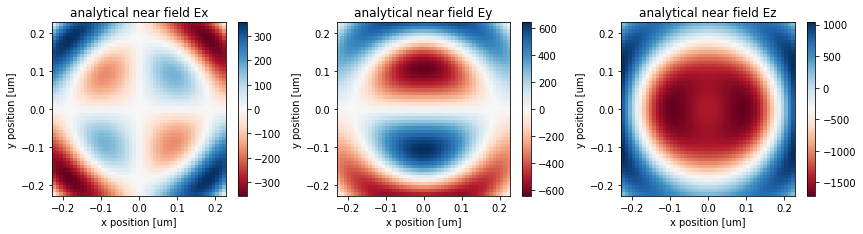

<Figure size 864x216 with 6 Axes>

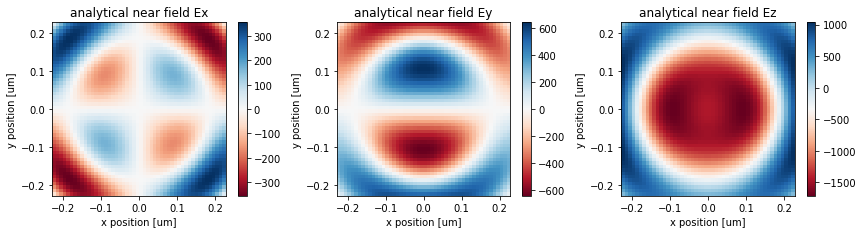

<Figure size 864x216 with 6 Axes>

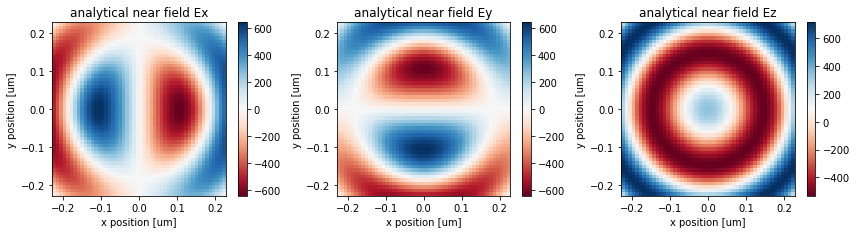

<Figure size 864x216 with 6 Axes>

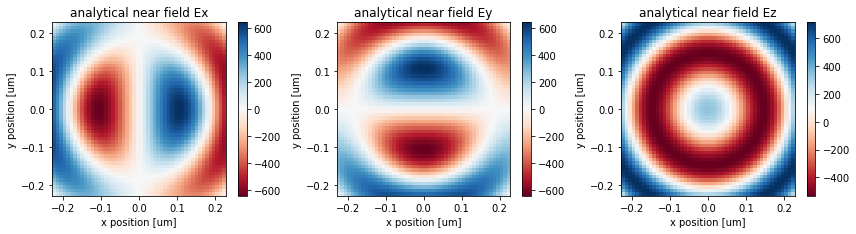

In [14]:
from tidy3d.plugins import Near2Far

n2fa = Near2Far.from_surface_monitors(
    sim_data=sim_data, 
    mons=monitors, 
    normal_dirs=['-','+','-','+','-','+'], 
    frequency=f0, 
    pts_per_wavelength=10,
    medium=medium
)
n2fa.initialize()
n2fa.phasor_sign = 1

for surface in n2fa.surfaces:
    
    mon_center = surface.mon.center
    
    xp = surface.currents['x'].values
    yp = surface.currents['y'].values
    zp = surface.currents['z'].values

    if surface.axis == 0:
        
        grid_points = np.meshgrid(yp, zp, indexing="ij")        
        r, theta, phi = n2fa._car_2_sph(xp, grid_points[0], grid_points[1])        
        temp1, temp2, E_near_an, H_near_an = dipole_field(r, theta, phi, f0, False)
        
        plot_E_components(yp, zp, E_near_an)
        
        signs = [-1.0, 1.0]
        if surface.normal_dir == '-':
            signs = [-1.0 * i for i in signs]

        surface.currents['Jy'].values = signs[0] * H_near_an[2]
        surface.currents['Jz'].values = signs[1] * H_near_an[1]
        
        surface.currents['My'].values = signs[1] * E_near_an[2]
        surface.currents['Mz'].values = signs[0] * E_near_an[1]
        
    elif surface.axis == 1:
        
        grid_points = np.meshgrid(xp, zp, indexing="ij")
        r, theta, phi = n2fa._car_2_sph(grid_points[0], yp, grid_points[1])        
        temp1, temp2, E_near_an, H_near_an = dipole_field(r, theta, phi, f0, False)

        plot_E_components(xp, zp, E_near_an)

        signs = [1.0, -1.0]
        if surface.normal_dir == '-':
            signs = [-1.0 * i for i in signs]

        surface.currents['Jx'].values = signs[0] * H_near_an[2]
        surface.currents['Jz'].values = signs[1] * H_near_an[0]
        
        surface.currents['Mx'].values = signs[1] * E_near_an[2]
        surface.currents['Mz'].values = signs[0] * E_near_an[0]

    else:
        
        grid_points = np.meshgrid(xp, yp, indexing="ij")
        r, theta, phi = n2fa._car_2_sph(grid_points[0], grid_points[1], zp)        
        temp1, temp2, E_near_an, H_near_an = dipole_field(r, theta, phi, f0, False)

        plot_E_components(xp, yp, E_near_an)

        signs = [-1.0, 1.0]
        if surface.normal_dir == '-':
            signs = [-1.0 * i for i in signs]

        surface.currents['Jx'].values = signs[0] * H_near_an[1]
        surface.currents['Jy'].values = signs[1] * H_near_an[0]
        
        surface.currents['Mx'].values = signs[1] * E_near_an[1]
        surface.currents['My'].values = signs[0] * E_near_an[0]



# Project the analytical near fields to the far field using near2far

In [15]:

# initialize the far field values
Ec2 = np.zeros((3, num_theta, num_phi), dtype=complex)
Ea2 = np.zeros((3, num_theta, num_phi), dtype=complex)

from rich.progress import track

# loop through points in the output plane
for i in track(np.arange(len(thetas)), description='Performing far-field transformation...'):

    theta = thetas[i]
    for j in np.arange(len(phis)):
        phi = phis[j]

        # compute and store the outputs from projection function at the focal plane
        _E, _H = n2fa.fields_spherical(far_distance, theta, phi)
        Ec2[:, i, j] = np.squeeze(_E)        
        Ea2[:, i, j], temp1, temp2, temp3 = dipole_field(far_distance, theta, phi, f0, True)
        
        #print(RCS[i, j], E[i, j])


Output()

# Compare the analytical far field, to the near2far projection of the analytical near field (i.e., Tidy3D not involved)

0.3990122995314969 1.8399150939220397
0.3962270897137702 1.8386329495541145


<Figure size 720x360 with 2 Axes>

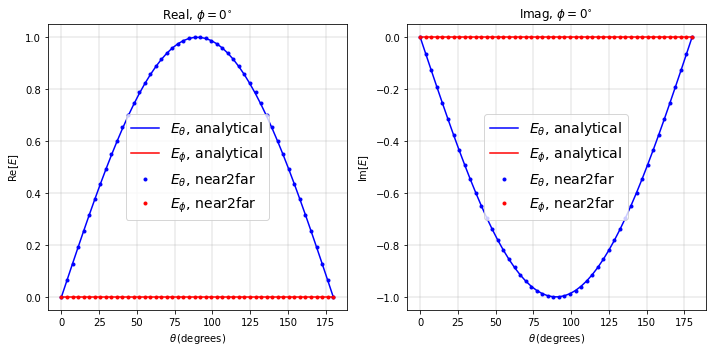

<Figure size 720x360 with 2 Axes>

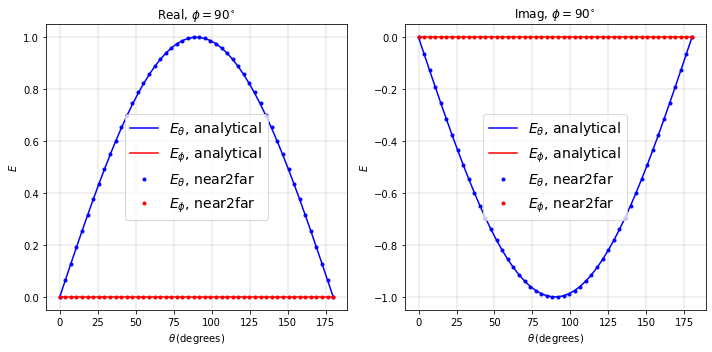

In [16]:
def scale_fn(val):
    val = val / np.max(np.abs(val))
    return 10.0*np.log10(val)

def plot_fn(val):
    return np.abs(val)

def realnorm_fn(val, norm_val):
    return np.real(val)/np.max(np.abs(np.real(norm_val)))

def imagnorm_fn(val, norm_val):
    return np.imag(val)/np.max(np.abs(np.imag(norm_val)))

print(np.max(np.abs(np.real(Ea2))), np.max(np.abs(np.imag(Ea2))))
print(np.max(np.abs(np.real(Ec2))), np.max(np.abs(np.imag(Ec2))))

fig, (ax) =  plt.subplots(1,2,figsize=(10, 5))

ax[0].plot(thetas * 180 / np.pi, realnorm_fn(Ea2[1,:,0], Ea2), '-b', label="$E_\\theta$, analytical")
ax[0].plot(thetas * 180 / np.pi, realnorm_fn(Ea2[2,:,0], Ea2), '-r', label="$E_\\phi$, analytical")
ax[0].plot(thetas * 180 / np.pi, realnorm_fn(Ec2[1,:,0], Ec2), '.b', label="$E_\\theta$, near2far")
ax[0].plot(thetas * 180 / np.pi, realnorm_fn(Ec2[2,:,0], Ec2), '.r', label="$E_\\phi$, near2far")
ax[0].set(xlabel = "$\\theta\\,$(degrees)",
       ylabel = "Re[$E$]",
       yscale = 'linear',
       xscale = 'linear'
      )
ax[0].set_title('Real, $\\phi = 0^{\\circ}$')
ax[0].grid(visible = True, which = 'both', axis = 'both', linewidth = 0.4)
ax[0].legend(loc='best', prop={'size': 14})

ax[1].plot(thetas * 180 / np.pi, imagnorm_fn(Ea2[1,:,0], Ea2), '-b', label="$E_\\theta$, analytical")
ax[1].plot(thetas * 180 / np.pi, imagnorm_fn(Ea2[2,:,0], Ea2), '-r', label="$E_\\phi$, analytical")
ax[1].plot(thetas * 180 / np.pi, imagnorm_fn(Ec2[1,:,0], Ec2), '.b', label="$E_\\theta$, near2far")
ax[1].plot(thetas * 180 / np.pi, imagnorm_fn(Ec2[2,:,0], Ec2), '.r', label="$E_\\phi$, near2far")
ax[1].set(xlabel = "$\\theta\\,$(degrees)",
       ylabel = "Im[$E$]",
       yscale = 'linear',
       xscale = 'linear'
      )
ax[1].set_title('Imag, $\\phi = 0^{\\circ}$')
ax[1].grid(visible = True, which = 'both', axis = 'both', linewidth = 0.4)
ax[1].legend(loc='best', prop={'size': 14})

fig.tight_layout()


fig, (ax) =  plt.subplots(1,2,figsize=(10, 5))

ax[0].plot(thetas * 180 / np.pi, realnorm_fn(Ea2[1,:,1], Ea2), '-b', label="$E_\\theta$, analytical")
ax[0].plot(thetas * 180 / np.pi, realnorm_fn(Ea2[2,:,1], Ea2), '-r', label="$E_\\phi$, analytical")
ax[0].plot(thetas * 180 / np.pi, realnorm_fn(Ec2[1,:,1], Ec2), '.b', label="$E_\\theta$, near2far")
ax[0].plot(thetas * 180 / np.pi, realnorm_fn(Ec2[2,:,1], Ec2), '.r', label="$E_\\phi$, near2far")
ax[0].set(xlabel = "$\\theta\\,$(degrees)",
       ylabel = "$E$",
       yscale = 'linear',
       xscale = 'linear'
      )
ax[0].set_title('Real, $\\phi = 90^{\\circ}$')
ax[0].grid(visible = True, which = 'both', axis = 'both', linewidth = 0.4)
ax[0].legend(loc='best', prop={'size': 14})

ax[1].plot(thetas * 180 / np.pi, imagnorm_fn(Ea2[1,:,1], Ea2), '-b', label="$E_\\theta$, analytical")
ax[1].plot(thetas * 180 / np.pi, imagnorm_fn(Ea2[2,:,1], Ea2), '-r', label="$E_\\phi$, analytical")
ax[1].plot(thetas * 180 / np.pi, imagnorm_fn(Ec2[1,:,1], Ec2), '.b', label="$E_\\theta$, near2far")
ax[1].plot(thetas * 180 / np.pi, imagnorm_fn(Ec2[2,:,1], Ec2), '.r', label="$E_\\phi$, near2far")
ax[1].set(xlabel = "$\\theta\\,$(degrees)",
       ylabel = "$E$",
       yscale = 'linear',
       xscale = 'linear'
      )
ax[1].set_title('Imag, $\\phi = 90^{\\circ}$')
ax[1].grid(visible = True, which = 'both', axis = 'both', linewidth = 0.4)
ax[1].legend(loc='best', prop={'size': 14})

fig.tight_layout()

plt.show()